In [19]:
import spyx
import spyx.nn as snn

import jax
import jax.numpy as jnp

import nir
# for loading dataset
import torch

import matplotlib.pyplot as plt

In [20]:
ng = nir.read("braille_subtract.nir")

In [21]:
ng.nodes.keys()

dict_keys(['fc1', 'fc2', 'input', 'lif1.lif', 'lif1.w_rec', 'lif2', 'output'])

In [22]:
ng.nodes.keys()

dict_keys(['fc1', 'fc2', 'input', 'lif1.lif', 'lif1.w_rec', 'lif2', 'output'])

In [23]:
data = torch.load("ds_test.pt")

In [24]:
x, y = data.tensors

In [25]:
x = jnp.array(x)

In [26]:
y = jnp.array(y)

In [27]:
x.shape # --> 256 time

(140, 256, 12)

In [44]:
import numpy as np


In [47]:
ng.nodes["lif1.lif"].output_type

{'output': array([55])}

In [48]:
n_list = ["input", "fc1", "lif1.lif", "lif1.w_rec", "output"]
subgraph_nodes = {k : ng.nodes[k] for k in n_list}
subgraph_edges = [
    ('input', 'fc1'),
    ('fc1', 'lif1.lif'),
    ('lif1.lif', 'lif1.w_rec'),
    ('lif1.w_rec', 'lif1.lif'),
    ('lif1.lif', 'output')
]
subgraph.nodes["output"].output_type['output'] = np.array([55])
subgraph = nir.NIRGraph(subgraph_nodes, subgraph_edges)

In [49]:
SNN, params = spyx.nir.from_nir(subgraph, x, dt=1e-4, return_all_states=True)

[INFO] found RNN subgraph, replacing with NIRGraph node
[INFO] subgraph edges: ('lif1.lif', 'lif1.w_rec'), ('lif1.w_rec', 'lif1.lif')
found subgraph, trying to parse as RNN
HERE: [0.00016667 0.00016667 0.00016667 0.00016667 0.00016667 0.00016667
 0.00016667 0.00016667 0.00016667 0.00016667 0.00016667 0.00016667
 0.00016667 0.00016667 0.00016667 0.00016667 0.00016667 0.00016667
 0.00016667 0.00016667 0.00016667 0.00016667 0.00016667 0.00016667
 0.00016667 0.00016667 0.00016667 0.00016667 0.00016667 0.00016667
 0.00016667 0.00016667 0.00016667 0.00016667 0.00016667 0.00016667
 0.00016667 0.00016667 0.00016667 0.00016667 0.00016667 0.00016667
 0.00016667 0.00016667 0.00016667 0.00016667 0.00016667 0.00016667
 0.00016667 0.00016667 0.00016667 0.00016667 0.00016667 0.00016667
 0.00016667]
found subgraph, trying to parse as RNN


In [50]:
params.keys()

dict_keys(['linear', 'RCuBaLIF'])

In [51]:
a, b = SNN.apply(params, x)

found subgraph, trying to parse as RNN


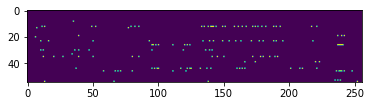

In [57]:
plt.imshow(a[0].T)

In [53]:
preds = jnp.argmax(jnp.sum(a,axis=1), axis=1)
preds

Array([12, 46, 12, 46, 35, 12, 12, 46, 46, 35, 46, 35, 35, 35, 35, 22, 46,
       46, 35, 12, 35, 46, 46, 35, 46, 46, 46, 12, 46, 46, 12, 46, 30, 13,
       46, 35, 12, 35, 46, 35, 12, 46, 35, 46, 44, 46, 35, 35, 35, 12, 46,
       35, 35, 46, 46, 46, 35, 35, 46, 35, 35, 35, 35, 35, 35, 46, 12, 46,
       35, 12, 35, 35, 35, 46, 35, 46, 46, 35, 12, 35, 46, 35, 46, 12, 35,
       12, 46, 35, 46, 35, 35, 35, 46, 35, 35, 35, 46, 35, 12, 35, 35, 35,
       35, 35, 46, 12, 35, 12, 46, 46, 46, 46, 35, 46, 35, 12, 46, 35, 46,
       35, 12, 12, 46, 35, 35, 46, 35, 46, 12, 35, 46, 35, 46, 35, 46, 12,
       12, 46, 46, 12], dtype=int32)

In [54]:
y

Array([1, 3, 2, 2, 6, 1, 1, 3, 4, 5, 4, 0, 5, 5, 0, 2, 4, 3, 1, 2, 5, 2,
       4, 6, 2, 2, 4, 1, 4, 4, 1, 3, 2, 0, 4, 5, 1, 0, 3, 5, 1, 2, 0, 4,
       5, 4, 5, 6, 6, 1, 4, 5, 0, 2, 3, 4, 5, 0, 2, 5, 5, 5, 6, 5, 6, 4,
       1, 2, 6, 1, 0, 0, 6, 4, 0, 3, 3, 0, 1, 6, 2, 0, 3, 1, 0, 1, 2, 0,
       3, 0, 0, 0, 4, 6, 1, 3, 2, 5, 2, 6, 0, 5, 5, 0, 3, 1, 6, 6, 3, 2,
       4, 4, 6, 3, 6, 2, 2, 5, 3, 6, 2, 1, 3, 6, 5, 4, 5, 4, 1, 6, 3, 0,
       3, 6, 3, 1, 6, 4, 3, 1], dtype=int32)

In [55]:
spyx.fn.integral_accuracy(a, y)

(Array(0., dtype=float32),
 Array([12, 46, 12, 46, 35, 12, 12, 46, 46, 35, 46, 35, 35, 35, 35, 22, 46,
        46, 35, 12, 35, 46, 46, 35, 46, 46, 46, 12, 46, 46, 12, 46, 30, 13,
        46, 35, 12, 35, 46, 35, 12, 46, 35, 46, 44, 46, 35, 35, 35, 12, 46,
        35, 35, 46, 46, 46, 35, 35, 46, 35, 35, 35, 35, 35, 35, 46, 12, 46,
        35, 12, 35, 35, 35, 46, 35, 46, 46, 35, 12, 35, 46, 35, 46, 12, 35,
        12, 46, 35, 46, 35, 35, 35, 46, 35, 35, 35, 46, 35, 12, 35, 35, 35,
        35, 35, 46, 12, 35, 12, 46, 46, 46, 46, 35, 46, 35, 12, 46, 35, 46,
        35, 12, 12, 46, 35, 35, 46, 35, 46, 12, 35, 46, 35, 46, 35, 46, 12,
        12, 46, 46, 12], dtype=int32))

In [18]:
b[0].shape

(280, 256, 55)